In [1]:
import numpy as np
import hdf5storage
import math
import matplotlib.pyplot as plt

fp = './dataset/indy_20161005_06.mat'

matdata = hdf5storage.loadmat(fp)
spike_arr = matdata['spikes']
cur_pos= matdata['cursor_pos']
fin_pos= matdata['finger_pos']
time_stamp = matdata['t'].squeeze(1)


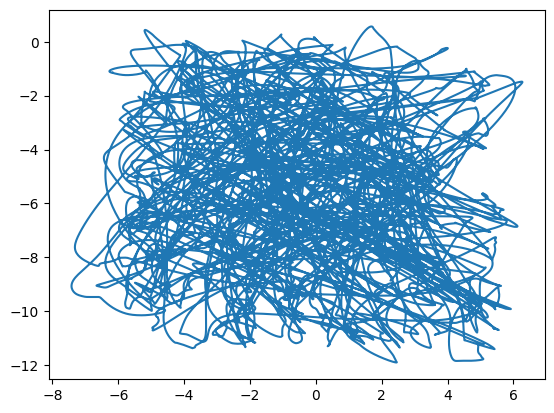

In [2]:
# 绘制手指移动轨迹
fin_pos_x = fin_pos[:, 1]
fin_pos_y = fin_pos[:, 2]
plt.plot(fin_pos_x, fin_pos_y)

In [3]:
tar_x = -1
tar_y = -6
trial = []

for t in range(0, fin_pos.shape[0]):
    dis = (fin_pos_x[t] - tar_x) * (fin_pos_x[t] - tar_x) + (fin_pos_y[t] - tar_y) * (fin_pos_y[t] - tar_y)
    if dis < 0.01:
        trial.append(time_stamp[t])
trial = [trial[0], trial[1], trial[3], trial[6], trial[8], trial[9], trial[10], trial[37], trial[39]]
print(trial)

[1313.288, 1395.948, 1403.836, 1417.984, 1433.968, 1442.864, 1528.848, 1556.652, 1587.076]


In [4]:
print(trial)

[1313.288, 1395.948, 1403.836, 1417.984, 1433.968, 1442.864, 1528.848, 1556.652, 1587.076]


In [5]:
trial_list = []
trial_total = []
chosen_spike = spike_arr[9][2].squeeze(1)
for t in trial:
    trial_start = t - 0.2 #200 ms before t
    trial_end = t + 1.2 #1200ms after t
    trial_event = []
    for i in chosen_spike:
        if i > trial_start and i <= trial_end:
            trial_event.append(i - t)
            trial_total.append(i - t)
    trial_list.append(trial_event)
print(trial_list)

[[-0.17935858899295454, -0.08990279855652261, -0.03280510082799992, 0.21184665599434993, 0.32059442340937494, 0.5311677837773914, 0.8968142316157355, 1.0076099798582163, 1.0416883762791258, 1.071466013527015, 1.1024314794592556, 1.1808281750429614], [-0.14152645128683616, -0.11117537615791662, -0.0912690029483656, -0.06521868742174775, -0.04609054681327507, 0.08604517346225293, 0.6833182900493284, 0.7752726441970026, 1.1936751139837725], [-0.13644492442631417, -0.11252450965366734, -0.025526288606442904, 0.035995052174030207, 0.05770364779868942, 0.48962277683813227, 0.7538532490286798, 1.142150393377051, 1.169511415720308], [-0.19261726296326742, 0.14800288899368752, 0.2808758412215866, 0.8679499688480519, 0.8956796275012948, 0.904526904807426, 0.9463876303102552], [0.6151841109692668], [-0.08414604541781046, -0.04404661053968084, -0.0003427249405376642, 0.013296820657160424, 0.1898735833478895, 0.20834635820733638, 0.3809090825373005, 1.0268828374212262, 1.1088840393722421], [0.75413

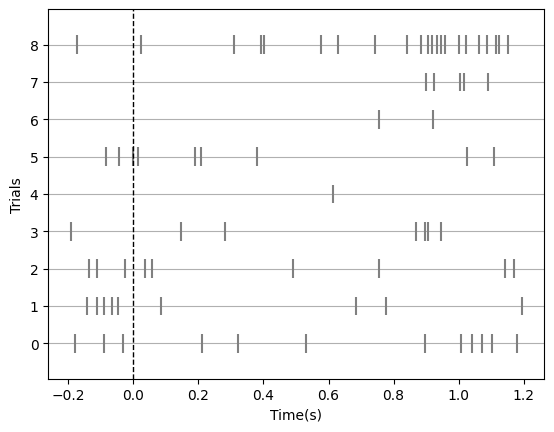

In [6]:
line_offset = np.array(range(0, 9, 1))
plt.eventplot(trial_list, lineoffsets=line_offset, linelengths=0.5, colors='grey')
plt.ylabel('Trials')
plt.xlabel('Time(s)')
plt.yticks(np.arange(0, 9))
plt.grid(True, axis='y')
plt.axvline(x=0.0, c='black', linestyle='--', linewidth = 1)
plt.show()

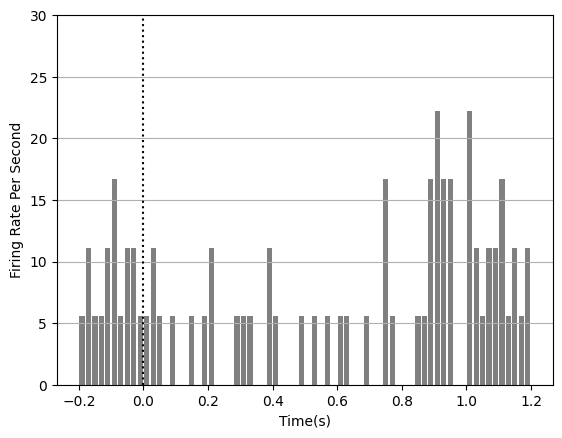

In [7]:

frate_bin = np.array(np.zeros(70))
trial_total.sort()
for t in trial_total:
    spike_bin_index = math.floor((t + 0.2)/0.02)
    frate_bin[spike_bin_index] = frate_bin[spike_bin_index] + 1
frate_bin = frate_bin * 50 / 9

plt.bar(np.arange(-0.19, 1.21, 0.02), frate_bin, width = 0.016, color = 'grey')
plt.xlabel('Time(s)')
plt.ylabel('Firing Rate Per Second') 
plt.xticks(np.arange(-0.2, 1.3, 0.2))
plt.yticks(np.arange(0, 32, 5))
plt.grid(True, axis='y')
plt.axvline(x=0.0, c='black', linestyle=':', linewidth = 1.5)

plt.show()

In [8]:
# 由于共有93501个段，姑且每个段取25个
# angle_bin: [-180, -170),[-170, 160), ..., [170, 180) 
speed_bin = np.array(np.zeros(14))
speed_count_bin = np.array(np.zeros(14))

for i in range(0, time_stamp.shape[0] - 25, 25):
    dx = fin_pos_x[i+25] - fin_pos_x[i]
    dy = fin_pos_y[i+25] - fin_pos_y[i]
    ds = math.sqrt(dx * dx + dy * dy)
    dt = time_stamp[i+25] - time_stamp[i]
    tmp_speed = ds/dt


    t_start =  time_stamp[i]
    t_end = time_stamp[i+25]
    tmp_spike_count = 0

     for s in chosen_spike:
        if s >=t_start and s < t_end:
            tmp_spike_count = tmp_spike_count + 1

    tmp_speed_bin_index = math.floor(tmp_speed/5)
    speed_bin[tmp_speed_bin_index] = speed_bin[tmp_speed_bin_index] + tmp_spike_count/(t_end - t_start)
    speed_count_bin[tmp_speed_bin_index] = speed_count_bin[tmp_speed_bin_index] + 1

for i in range(0, 14):
    if(speed_count_bin[i] > 0):
        speed_bin[i] = speed_bin[i]/speed_count_bin[i]

speed_x = np.arange(0, 0.7, 0.05)
# plt.plot(speed_x, speed_bin)
# plt.yticks(np.arange(0, 50, 10))
# plt.grid(True)

# plt.show()
    


KeyboardInterrupt: 

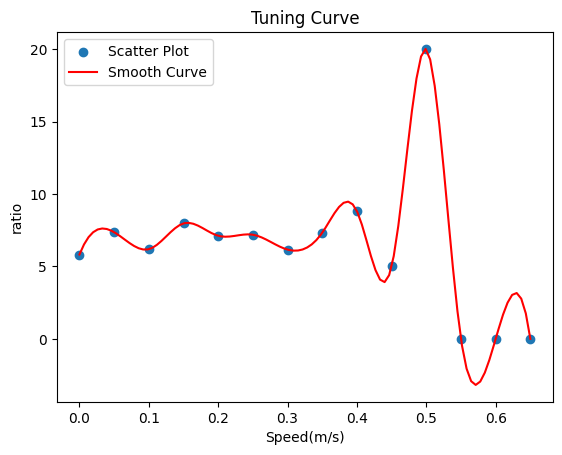

In [ ]:
from utils.tuning_curve_utils import plot_tuning_curve
plot_tuning_curve(speed_x, speed_bin)